In [1]:
%matplotlib inline

In [2]:
import geopandas as gp
import matplotlib.pyplot as plt

In [3]:
neighborhoods = gp.read_file('data/Neighborhoods_2012b.json')
sq_miles = gp.read_file('data/chicago_sq_miles.json')
parcels = gp.read_file('data/parcels.json')

In [4]:
# Filter out rows with an age of 0 (which I'm assuming is a null value indicator)
parcels = parcels[parcels['BldgAge'] > 0]

##### Mean building age by neighborhood

In [5]:
parcels_neighborhood_merged = gp.sjoin(parcels, neighborhoods, how="inner", op='intersects')
mean_neighborhoods_age = parcels_neighborhood_merged[['geometry', 'PRI_NEIGH', 'BldgAge']].dissolve(by='PRI_NEIGH', aggfunc='mean')
mean_neighborhoods_age.reset_index(inplace=True)

# We want to use the geometry from `neighborhoods`
mean_neighborhoods_age = neighborhoods.merge(mean_neighborhoods_age[['PRI_NEIGH', 'BldgAge']], on='PRI_NEIGH')

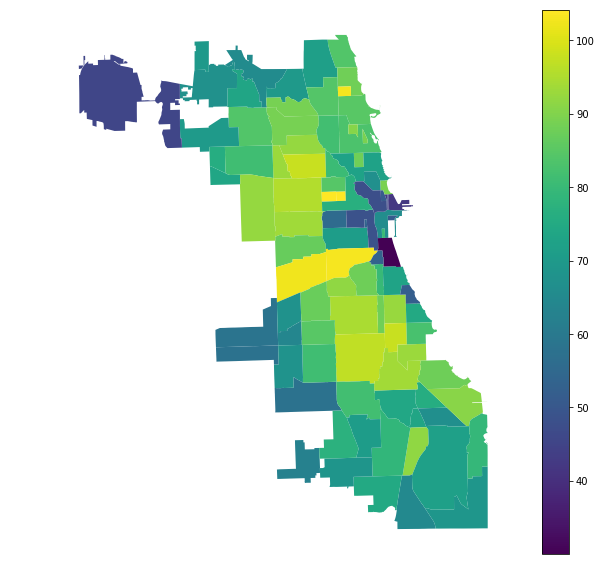

In [6]:
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
ax.set_aspect('equal')

mean_neighborhoods_age.plot(column='BldgAge', legend=True, ax=ax)
plt.show()

#### Mean building age by square mile
To get a more detailed look, here the city has been divided up into 1 sq mile blocks

In [7]:
parcels_sq_miles_merged = gp.sjoin(parcels, sq_miles, how="inner", op='intersects')
parcels_sq_miles_merged.drop(columns='OBJECTID_left', inplace=True)
parcels_sq_miles_merged.rename(columns={'OBJECTID_right': 'OBJECTID'}, inplace=True)

mean_sq_miles_age = parcels_sq_miles_merged[['geometry', 'OBJECTID', 'BldgAge']].dissolve(by='OBJECTID', aggfunc='mean')
mean_sq_miles_age.reset_index(inplace=True)

# We want to use the geometry from `sq_miles`
mean_sq_miles_age = sq_miles.merge(mean_sq_miles_age[['OBJECTID', 'BldgAge']], on='OBJECTID')

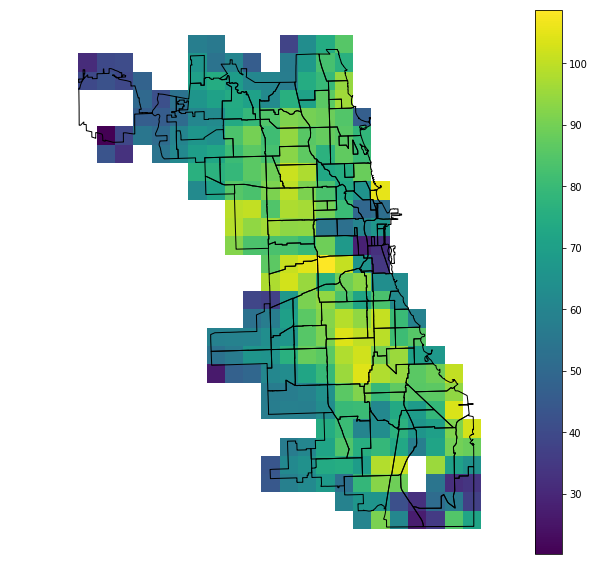

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
ax.axis('off')
ax.set_aspect('equal')
mean_sq_miles_age.plot(column='BldgAge', legend=True, ax=ax)
neighborhoods.plot(ax=ax, facecolor='none', edgecolor='black')
plt.show()